In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file=r'us-airlines-monthly-aircraft-miles-flown.csv'
df=pd.read_csv(file,parse_dates=[0])
df.head(5)

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [3]:
df.shape

(96, 2)

<Axes: >

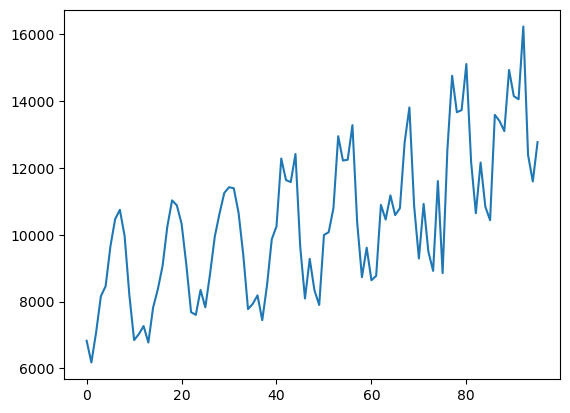

In [154]:
df["MilesMM"].plot()

<Axes: ylabel='MilesMM'>

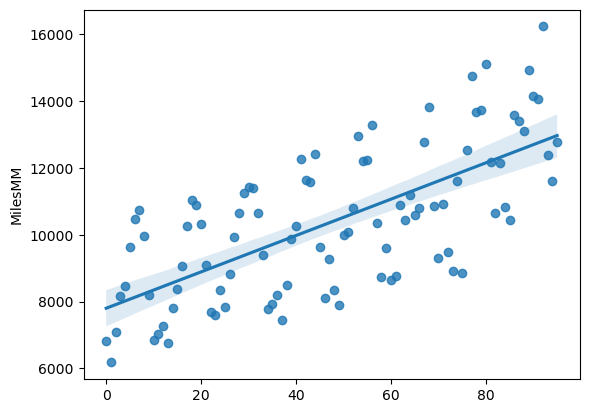

In [155]:
sns.regplot(x=df.index.values,y=df.MilesMM,data=df,order=1)

### Removing seasionality

In [156]:
df["year"]=df["Month"].dt.year

In [157]:
df

,Month,MilesMM,year,lag
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0
...,...,...,...,...
91,1970-08-01,14057,1970,14147.0
92,1970-09-01,16234,1970,14057.0
93,1970-10-01,12389,1970,16234.0
94,1970-11-01,11595,1970,12389.0


In [146]:
df.groupby('year')["MilesMM"].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

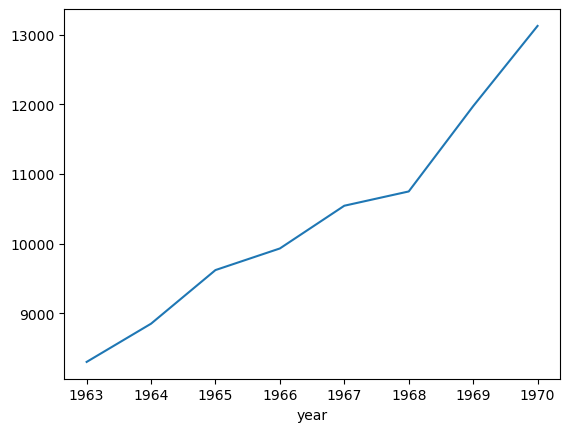

In [163]:
df.groupby('year')["MilesMM"].mean().plot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

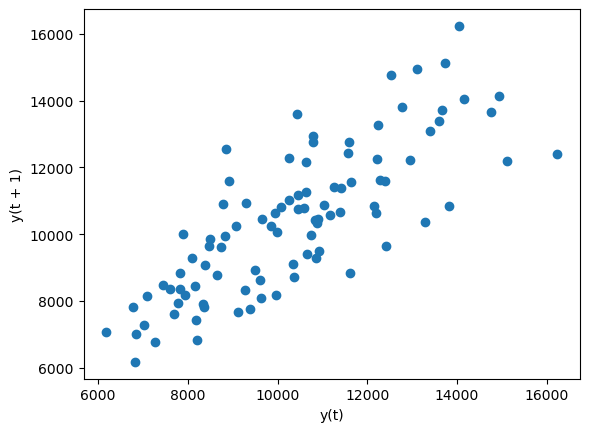

In [164]:
from pandas.plotting import lag_plot, autocorrelation_plot
lag_plot(df['MilesMM'])

In [165]:
df["lag"]=df["MilesMM"].shift(1)

<Axes: xlabel='lag', ylabel='MilesMM'>

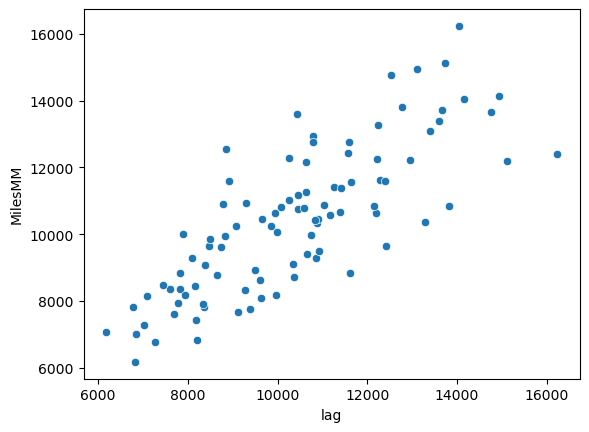

In [166]:
sns.scatterplot(x=df['lag'],y=df["MilesMM"])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

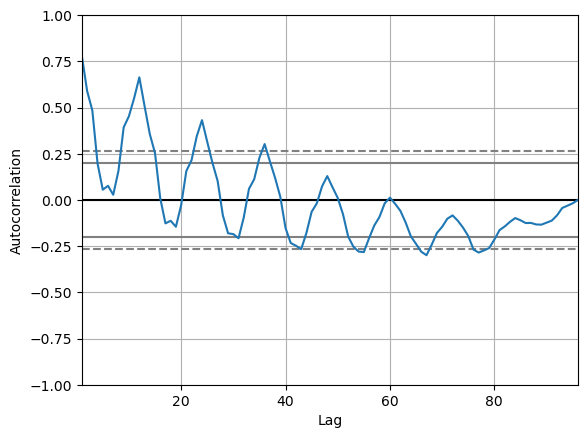

In [167]:
autocorrelation_plot(df["MilesMM"])

In [168]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [169]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [170]:
#Downsampling
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [171]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [172]:
yearly_total_miles_df.head(8)

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515
1968-12-31,128975
1969-12-31,143664
1970-12-31,157497


In [124]:
#Upsampling
upsampled_miles_df = miles_df.resample('D', on='Month').mean()
upsampled_miles_df = miles_df.resample('D', on='Month').mean()
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [160]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [161]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<Axes: xlabel='Month'>

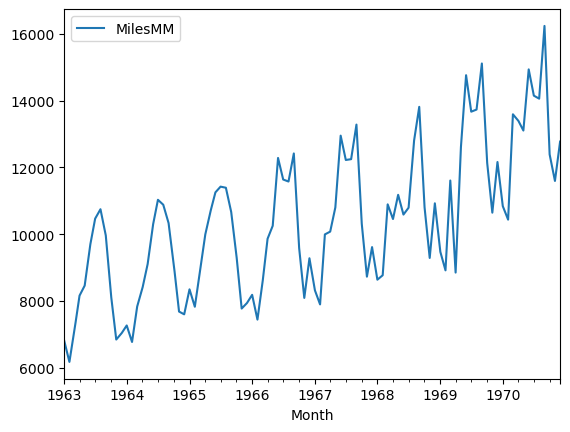

In [162]:
interpolated_miles_df.plot()

In [172]:

df=pd.read_csv(r"C:\Users\01_Ravi\Downloads\ai4i2020.csv",header=0)

In [6]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


0    9981
1      19
Name: RNF, dtype: int64

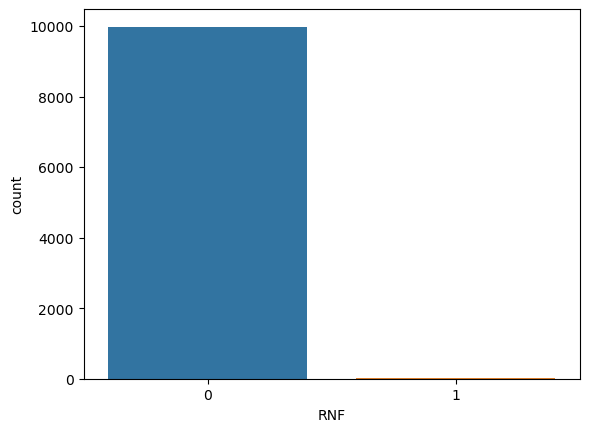

In [9]:
sns.countplot(x=df.RNF)
df.RNF.value_counts()

In [10]:
df.TWF.value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [11]:
df.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='Count'>

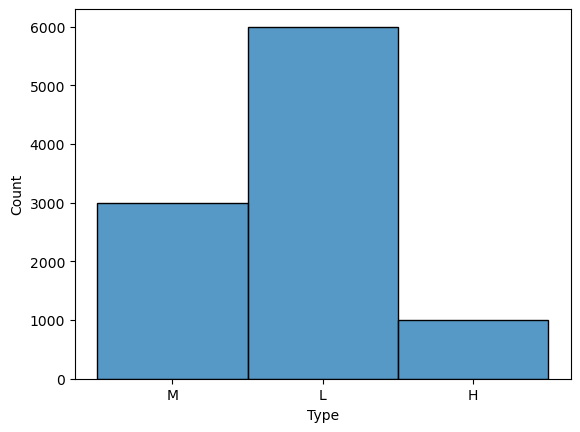

In [12]:
sns.histplot(df.Type)

<Axes: >

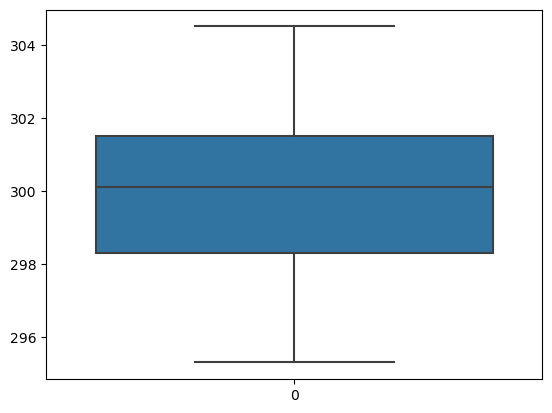

In [13]:
sns.boxplot(df['Air temperature [K]'])

C:\Users\01_Ravi\AppData\Local\Temp\ipykernel_14680\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

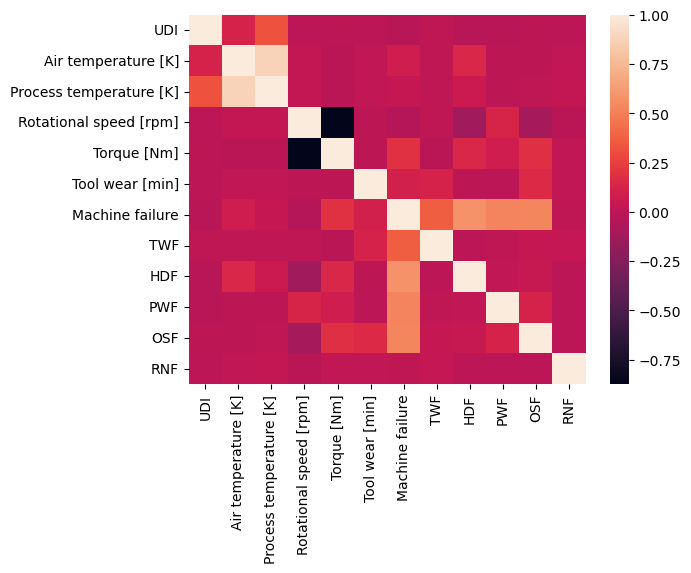

In [14]:
sns.heatmap(df.corr())

In [15]:
df.corr()

C:\Users\01_Ravi\AppData\Local\Temp\ipykernel_14680\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


In [16]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [153]:
enc=LabelEncoder()

In [154]:
df["Type"]=enc.fit_transform(df["Type"])

In [155]:
df["Product ID"]=enc.fit_transform(df["Product ID"])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  int64  
 2   Type                     10000 non-null  int64  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(11

In [157]:
df["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [158]:
x=df.drop(columns=['UDI','Product ID','Machine failure',"TWF",'HDF','PWF','OSF','RNF'])

In [159]:
y=df["Machine failure"]

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
model=DecisionTreeClassifier(random_state=0)

In [162]:
model.fit(x[:7000],y[:7000])

DecisionTreeClassifier(random_state=0)

In [163]:
pred=model.predict(x)

In [164]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(pred,y)

0.9947

In [165]:
tpred=model.predict(x[7001:])

In [166]:
accuracy_score(tpred,y[7001:])

0.9823274424808269

In [167]:
print(classification_report(pred,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9652
           1       0.94      0.91      0.92       348

    accuracy                           0.99     10000
   macro avg       0.97      0.95      0.96     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

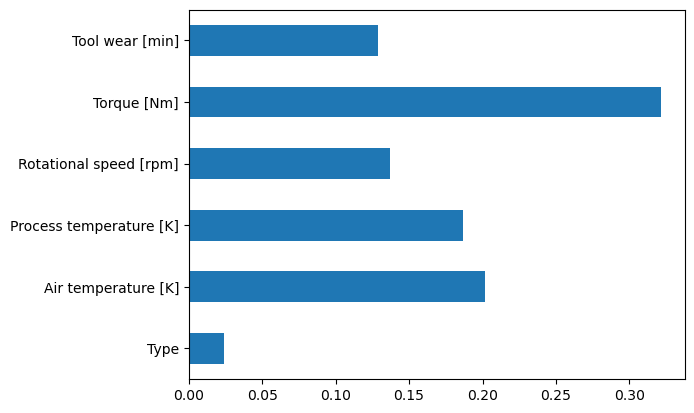

In [168]:
feat=pd.Series(model.feature_importances_,index=x.columns)

feat.plot(kind='barh')

In [169]:
print(classification_report(tpred,y[7001:]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2929
           1       0.64      0.56      0.60        70

    accuracy                           0.98      2999
   macro avg       0.81      0.77      0.79      2999
weighted avg       0.98      0.98      0.98      2999



<Axes: >

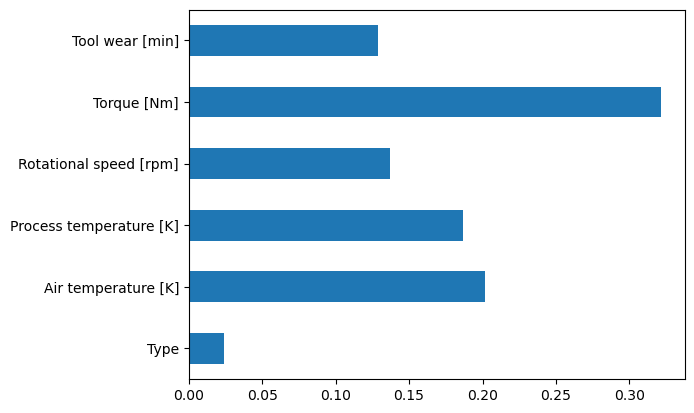

In [170]:
feat=pd.Series(model.feature_importances_,index=x.columns)

feat.plot(kind='barh')

In [171]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [110]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 429.8 KB


In [111]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Machine failure
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
model=RandomForestClassifier()

In [148]:

model.fit(x,y)

RandomForestClassifier()

In [149]:
predrfc=model.predict(x)

In [150]:
print(classification_report(y,predrfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9661
           1       1.00      1.00      1.00       339

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [151]:
accuracy_score(y,predrfc)

1.0

<Axes: >

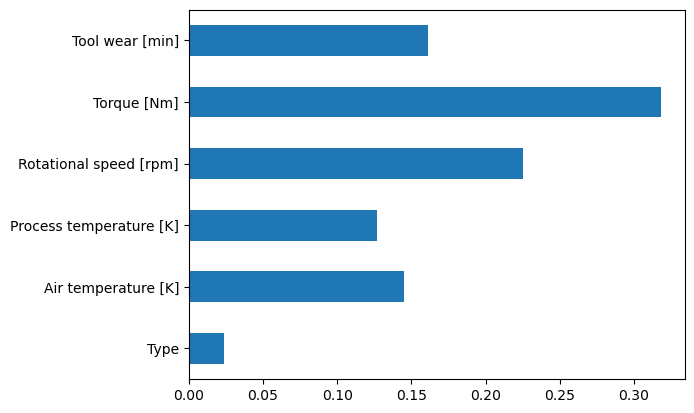

In [152]:
feat=pd.Series(model.feature_importances_,index=x.columns)

feat.plot(kind='barh')

In [174]:
tpredtest=model.predict(x[7001:])

In [175]:
accuracy_score(tpredtest,y[7001:])

0.9823274424808269

<Axes: >

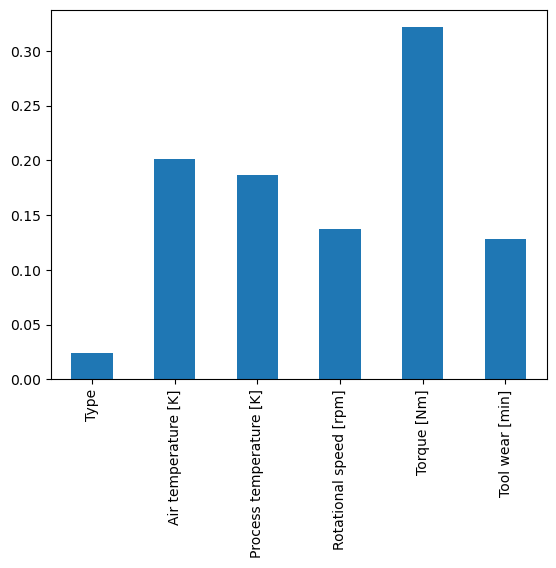

In [176]:
feat=pd.Series(model.feature_importances_,index=x.columns)

feat.plot(kind='bar')